![images](https://user-images.githubusercontent.com/42184553/55184987-7a4f1400-51a4-11e9-8476-750bd7160da2.png)

#  Analyze A/B Test Results
#### Project - Data Analyst Nanodegree
#### Udacity - May 2, 2019
#### Alaa Alaboud - Dhahran - KSA

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [Authored By](#authored)



<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# load dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# number of rows in dataset, [0] to get just rows.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
# count of unique users 
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
# the mean of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# number of times new_page and treatment do not show together
num_lineup = df.query("group == 'treatment' and landing_page != 'new_page'").count() + df.query("group == 'control' and landing_page == 'new_page'").count()
num_lineup

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
# check missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# count treatment is not aligned with new_page or control is not aligned with old_page
num_lineup3 = df.query("group == 'treatment' and landing_page != 'new_page'").count() + df.query("group == 'control' and landing_page != 'old_page'").count()
num_lineup3

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [10]:
# dropping rows by this specification
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [11]:
#create an empty dataframe, with index = 0
df2 = pd.DataFrame()
index = 0
df2 = df2.append(df) 
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# count of unique users in new dataframe df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# get the duplicated rows user id in df2
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [15]:
# check for duplicates in the user_id col
sum(df2.duplicated(['user_id']))

1

c. What is the row information for the repeat **user_id**? 

In [16]:
#  information for repeat user_id 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#drop duplicates
df2.drop_duplicates(['user_id'], inplace=True)

In [18]:
# check for duplicates in the user_id col after drop
sum(df2.duplicated(['user_id']))

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# mean for individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# mean for converted individual in control group
df2[df2['group'] == "control"]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# mean for converted individual in treatment group
df2[df2['group'] == "treatment"]['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
# mean for individual received new page
(df2.landing_page == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- **will, I don't think there is sufficient evidence to say that the new treatment page leads to more conversions.**

- **but we can say that control pages have more conversions according to our analysis, the conversion rate for the control group with 0.1203 is higher than the treatment group with 0.1188, as you see there is a small difference between them.**

- **so we can say the old page does better, until now, but we need more evidence and more analysis on any factors related on the success page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **The Hypothesis is:**

$$H_{0} : p_{new} - p_{old} <= 0$$

$$H_{1} : p_{new} - p_{old} >  0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# mean for hypotheses convert rate for new page under the null assuming new and old page are equal
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# mean for hypotheses convert rate for old page under the null assuming new and old page are equal
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
# count number of new page show in dataset
n_new = df2.query('landing_page == "new_page"').count()['user_id']
n_new

145310

d. What is $n_{old}$?

In [26]:
# count number of old page show in dataset
n_old = df2.query('landing_page == "old_page"').count()['user_id']
n_old 

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
# Drawing samples from a binomial distribution of probability new page
new_page_converted = np.random.binomial(1, p=p_new, size=n_new) 
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
# Drawing samples from a binomial distribution of probability old page
old_page_converted = np.random.binomial(1, p=p_old, size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# the difference bettwen mean converted in each page
diffs = new_page_converted.mean() - old_page_converted.mean()
diffs

0.000844582687238582

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
# Create sampling 10k values distribution for the difference in completion rates

p_diffs = []

for _ in range(10000):
    
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    
    new_page = new_page_converted.mean()
    old_page = old_page_converted.mean()
# append diffs in the array p_diffs between new and old pages  
    p_diffs.append(new_page - old_page)   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [31]:
# convert to numpy array
p_diffs = np.array(p_diffs)

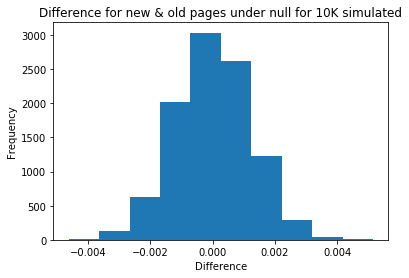

In [32]:
# plot distribution
plt.hist(p_diffs)

plt.title('Difference for new & old pages under null for 10K simulated')
plt.xlabel('Difference')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
# Actual difference of converted rates
actual_difference = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())

In [34]:
# proportion of the: p_diffs > actual difference
prop_p_diffs = (p_diffs > actual_difference).mean()
prop_p_diffs

0.9103

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- **We are computing in part j the proportion when p_diffs are greater than the actual difference.**
- **The "Actual difference" represents the difference for converted rates of new page and old page. "population"**
- **The "p_diffs" is represents the simuated difference for converted rates of new page and old page, based on 10k simulated samples. "sample"**
- **This value called in scientific studies as "p-value".**
- **This value gets 0.9103, that means we fail to reject the null hypothesis because the new page doesn't have better conversion rates than the old page because the value 0.9103 is higher than 0.05.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
# import statsmodel library
import statsmodels.api as sm

# numbers of conversions for old page
convert_old = sum(df2.query('group == "control"')['converted'])
# numbers of conversions for new page
convert_new = sum(df2.query('group == "treatment"')['converted'])

# numbers of individuals who received old page
n_old = df2.query("group == 'control'")['user_id'].count()
# numbers of individuals who received new page
n_new = df2.query("group == 'treatment'")['user_id'].count()

# prints output
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
# compute test statistic and p-value using built in
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **The z_score it’s a measure of how many standard deviations below or above the population mean a raw score is.**
- **we found the z_score is with -1.3109 lower than the critical value with 0.9050, we fail to reject the null.**

- **The p-value is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event.**
- **A smaller p-value indicates that there is stronger evidence favoring the alternative hypothesis. but we found p-values with 0.9050 are not big different from what we have in part j and k and are still big then 0.05.**

- **so they agree with the findings in previous parts, that means we fail to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- **We can use Logistic Regression because we want to conduct when the dependent variable is dichotomous means conversion or no conversion, in this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# import statsmodel library
import statsmodels.api as sm

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
# Create intercept column
df2['intercept'] = 1

# Create dummy variable
ab_page = ['treatment', 'control']
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
# using statsmodels "sm" and import Logistic regression model
# fits results
logic_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logic_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
# summary of results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:09:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- **The p-value associated with ab_page column is 0.190 which is higher than the p-value so it's not statistically significant, that mean we fail to reject the null hypothesis.**
- **The p-value differs from the value we found in Part II because in Part II we randomly sampled the data 10k times, and p-values we got in logistic regression is dichotomous (binary).**
- **The Logistic Regression determines only two possible outcomes, conversion or no conversion, so The Hypothesis is:**

$$H_{0} : p_{new} - p_{old} = 0$$

$$H_{1} : p_{new} - p_{old} != 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors that might influence whether or not an individual converts:**

#### Advantages:
- is good to add more factors into our regression model, because this makes our hypothesis results more reliable as it can improve the results. 

#### Disadvantages:
- The independent variables should not be correlated with each other means no multicollinearity, because these Estimates for regression coefficients can be unreliable, and Tests of significance for regression coefficients can be misleading.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
# load countries dataset

df3 = pd.read_csv('./countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
# merge datasets 
new_df = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [44]:
# Create dummy variables
new_df[['UK','US']] = pd.get_dummies(new_df['country'])[['UK','US']]
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
# Create intercept column
new_df['intercept'] = 1
# using Logistic regression model 
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'UK', 'US', 'ab_page']])

# fits results
results = log_mod.fit()
# summary of results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        22:10:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [46]:
# the exponential
np.exp(results.params)

intercept    0.131332
UK           1.051944
US           1.041599
ab_page      0.985168
dtype: float64

In [47]:
1/_

0.00010001000100010001

In [48]:
# mean for group by converted
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions

**According to the analysis performed for an e-commerce website:**

- I found that the old page has more conversion than the new page.
- we see that the p-value is higher in the US with 0.130 than in the UK with 0.074, which means that users in the US are more likely to convert, and the p-values are still larger than alpha 0.05.
- so comparing users among different countries doesn't show considerable difference in statistics. 
- therefore I fail to reject the null hypothesis. 

**My advice to the company is,  shouldn't implement the new page as our analysis shows that the old page is better and have more conversion.**

<a id='authored'></a>
## Authored By:

Alaa Adil Alaboud - Saudi Arabia

[GitHub-Alaa-1989](https://github.com/Alaa-1989)

[LinkedIn-alaa-alaboud](https://www.linkedin.com/in/alaa-alaboud/)